## Benchmarking Results for the multimodal RAG Approach by comparing Byaldi and CLIP Approach

In [1]:
from Create_Benchmark_Doc import search_via_byaldi, search_via_CLIP_similarity

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [1]:
text_query = "What are the different stages of a data life cycle?"
k = 2

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You are using in-memory collection. This means every image is stored in memory.
You might want to rethink this if you have a large collection!
Loaded 2534 images from 6 JSON files.


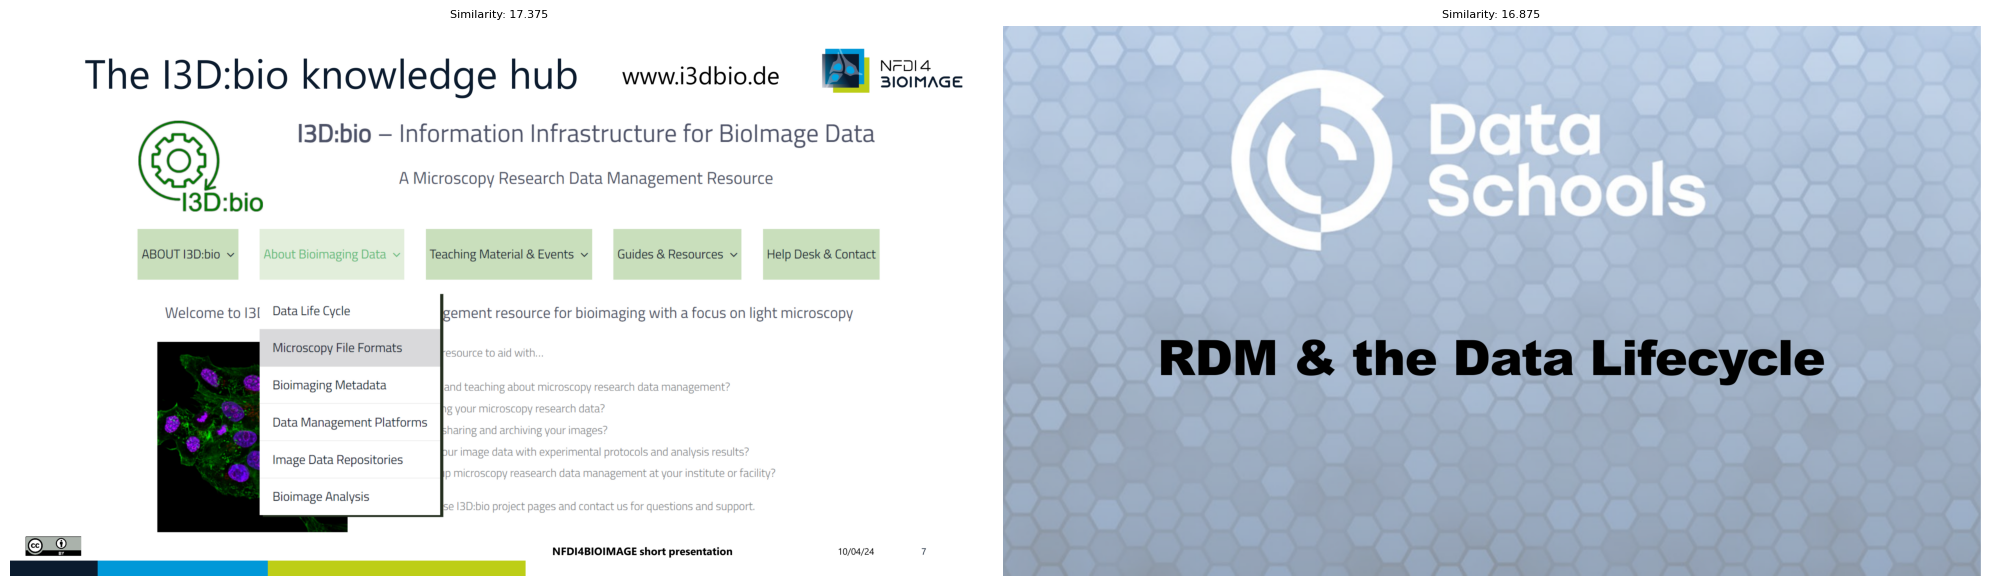

In [3]:
search_via_byaldi(text_query, k)

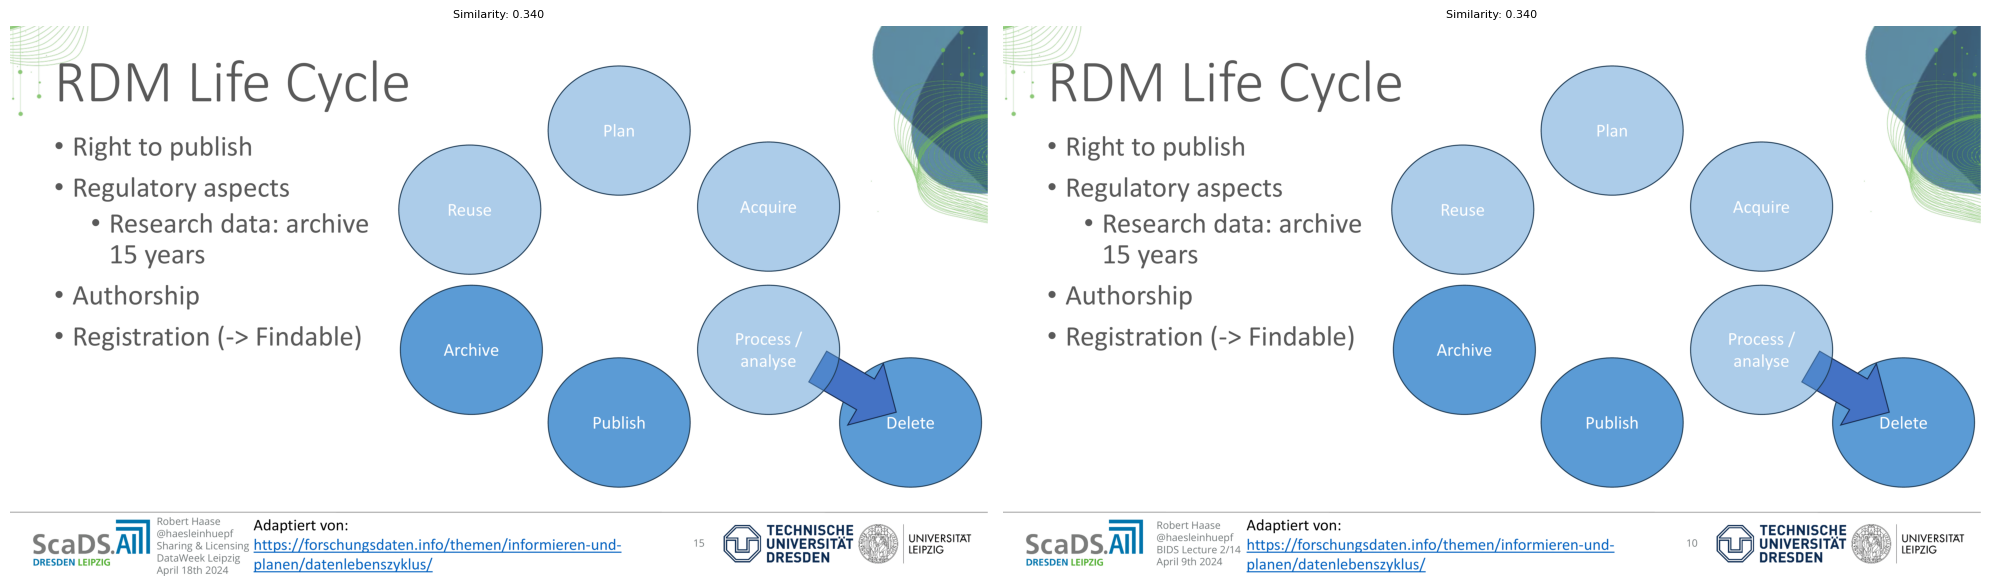

In [3]:
search_via_CLIP_similarity(text_query, k)

## Try the workflow at once with multiple queries

In [1]:
from Create_Benchmark_Doc import generate_comparison_pdf
from byaldi import RAGMultiModalModel
import os 
import sys
from transformers import CLIPProcessor, CLIPModel

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [2]:
# Search Queries
queries = [
    "How is AI used in bioimage analysis?",
    "What are the benefits of using machine learning in microscopy?",
    "What is bioimage analysis?",
    "What tools are commonly used for image analysis in bioimaging?",
    "What are different segmentation methods used for microscopy data analysis?",
    "What’s the difference between bioinformatics and bioimage analysis?",
    "How can I make my microscopy data FAIR?",
    "What are the FAIR principles in data management?",
    "What is Fiji and how is it used?",
    "What is Napari and when should I use it?",
    "How does OMERO help with data storage and sharing?",
    "What are different license types that can be used for sharing data?",
    "What does open science mean for data sharing?",
    "Why is open source software important in scientific research?",
    "How can I use Python for bioimage analysis?",
    "What Python libraries are helpful for image processing?",
    "How can I ensure reproducibility in my image analysis pipeline?",
    "What are common steps in a reproducible bioimage analysis workflow?",
    "What are the key parts of research data management?",
    "How can I share my microscopy data with others?",
]

### Create Model instances

In [3]:
# Add parent directory to be able to import modules / files
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

In [4]:
# Create RAG instance
docs_retrieval_model = RAGMultiModalModel.from_pretrained(pretrained_model_name_or_path = "vidore/colpali-v1.2", device = "cpu")

# Deifne path to the index
index_path = os.path.join(parent_dir, ".byaldi", "pdf_index")

# Load index
docs_retrieval_model = RAGMultiModalModel.from_index(index_path, device='cpu')

# Load CLIP
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You are using in-memory collection. This means every image is stored in memory.
You might want to rethink this if you have a large collection!
Loaded 2534 images from 6 JSON files.


## Looping over all queries to get single PDFs
Due to memory issues, that can't be solved, all PDFs are first saved individually and then merged afterwards.

In [6]:
for i, query in enumerate(queries):
    generate_comparison_pdf([query], docs_retrieval_model, clip_model, clip_processor, k_results=10, output_path=f"benchmark_query_{i+1}.pdf")

Processing query: How can I use Python for bioimage analysis?
Processing the Byaldi approach...
Processing the CLIP approach...
Plotting...


### Merge all PDFs together

In [8]:
from PyPDF2 import PdfMerger

pdfs = [f"benchmark_query_{i+1}.pdf" for i in range(len(queries))]
merger = PdfMerger()

In [9]:
for pdf in pdfs:
    merger.append(pdf)

merger.write("benchmark_slides.pdf")
merger.close()

# Evaluate the Benchmark Results
To evaluate the results, four members of our team ranked the 20 benchmark trials regarding whether Approach A (Byaldi) or Approach B (CLIP) performed best. 

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt

#Load the .csv file with the results
df = pd.read_csv('Benchmark_Byaldi_CLIP_result.csv')
print(df.head())

  Approach    1    2    3    4    5    6    7    8    9  ...   11   12   13  \
0       A   NaN  1.0  NaN  3.0  3.0  1.0  4.0  2.0  3.0  ...  NaN  4.0  4.0   
1        B  3.0  3.0  3.0  1.0  NaN  NaN  NaN  1.0  NaN  ...  4.0  NaN  NaN   
2     Both  NaN  NaN  1.0  NaN  1.0  NaN  NaN  1.0  1.0  ...  NaN  NaN  NaN   
3  Neither  1.0  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  ...  NaN  NaN  NaN   

    14   15   16   17   18   19   20  
0  2.0  4.0  2.0  3.0  NaN  1.0  4.0  
1  NaN  NaN  2.0  1.0  3.0  NaN  NaN  
2  2.0  NaN  NaN  NaN  1.0  3.0  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[4 rows x 21 columns]


In [21]:
# Fill NaNs with 0 to avoid problems during summation
df = df.fillna(0)
df

,Approach,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A,0.0,1.0,0.0,3.0,3.0,1.0,4.0,2.0,3.0,...,0.0,4.0,4.0,2.0,4.0,2.0,3.0,0.0,1.0,4.0
1,B,3.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0
2,Both,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,0.0
3,Neither,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Sum over all scores for each Approach
df['Sum'] = df.iloc[:, 1:].apply(lambda row: row.dropna().sum(), axis=1)
df

,Approach,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Sum
0,A,0.0,1.0,0.0,3.0,3.0,1.0,4.0,2.0,3.0,...,4.0,4.0,2.0,4.0,2.0,3.0,0.0,1.0,4.0,44.0
1,B,3.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,21.0
2,Both,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,0.0,11.0
3,Neither,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


## Plot the total scores for each approach

By looking at the plot one can clearly see, that approach A has the overall best result in this Benchmark.
But still there is also a quite remarkable amount of cases, in which none of the approaches was suitable.

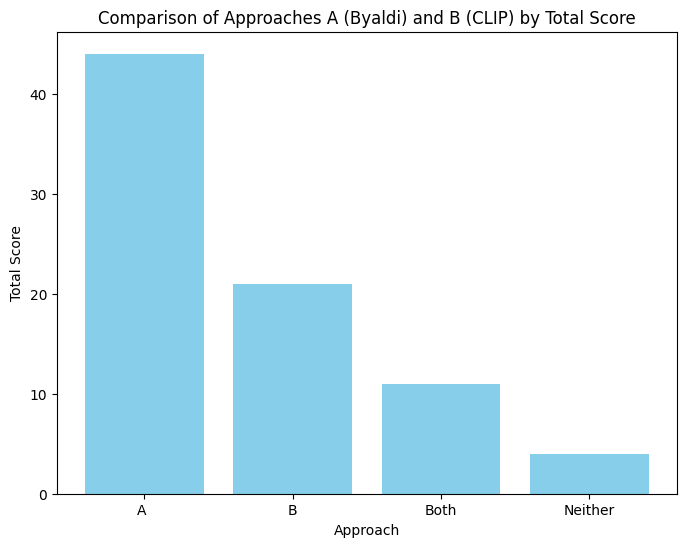

In [23]:
# Group by 'Approach' and sum the total scores
approach_scores = df.groupby('Approach')['Sum'].sum().reset_index()

# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(approach_scores['Approach'], approach_scores['Sum'], color='skyblue')
plt.xlabel('Approach')
plt.ylabel('Total Score')
plt.title('Comparison of Approaches A (Byaldi) and B (CLIP) by Total Score')
plt.show()